<a href="https://colab.research.google.com/github/Oppepper97/Thesis/blob/main/K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means clustering model for identifying where the most space and the greatest concentration of players are expected to be on the field.


In this Jupyter Notebook we will develop a K-means clustering model that can give explanation to the game principle of control of space.

This model seeks to divide the data into K groups, with each data point belonging to the cluster with the closest mean. By combining related data points, K-Means clustering on the extracted features (such as player locations, distances, and spatial parameters) can be used to identify specific spaces on the field. We can visualize and comprehend spatial patterns in defensive game principles with the aid of the generated clusters.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Sample_Game_1_RawEventsData.csv to Sample_Game_1_RawEventsData.csv
Saving Sample_Game_1_RawTrackingData_Away_Team.csv to Sample_Game_1_RawTrackingData_Away_Team.csv
Saving Sample_Game_1_RawTrackingData_Home_Team.csv to Sample_Game_1_RawTrackingData_Home_Team.csv
User uploaded file "Sample_Game_1_RawEventsData.csv" with length 139446 bytes
User uploaded file "Sample_Game_1_RawTrackingData_Away_Team.csv" with length 32782073 bytes
User uploaded file "Sample_Game_1_RawTrackingData_Home_Team.csv" with length 32782961 bytes


In [20]:
df_event_data = pd.read_csv('Sample_Game_1_RawEventsData.csv')
df_tracking_home = pd.read_csv('Sample_Game_1_RawTrackingData_Home_Team.csv', header=[0,1])
df_tracking_away = pd.read_csv('Sample_Game_1_RawTrackingData_Away_Team.csv', header=[0,1])


<ipython-input-20-425bd6709428>:2: DtypeWarning: Columns (0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tracking_home = pd.read_csv('Sample_Game_1_RawTrackingData_Home_Team.csv', header=[0,1])
<ipython-input-20-425bd6709428>:3: DtypeWarning: Columns (0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tracking_away = pd.read_csv('Sample_Game_1_RawTrackingData_Away_Team.csv', header=[0,1])


# Renaming columns tracking datasets

In [21]:
df_tracking_away.head(5)

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0      Away  \
  Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1        25   
0             Period              Frame           Time [s]  Player25   
1                  1                  1               0.04   0.90509   
2                  1                  2               0.08   0.90494   
3                  1                  3               0.12   0.90434   
4                  1                  4               0.16   0.90377   

  Unnamed: 4_level_0      Away Unnamed: 6_level_0      Away  \
  Unnamed: 4_level_1        15 Unnamed: 6_level_1        16   
0                NaN  Player15                NaN  Player16   
1            0.47462   0.58393            0.20794   0.67658   
2            0.47462   0.58393            0.20794   0.67658   
3            0.47463   0.58393            0.20794   0.67658   
4            0.47463   0.58351            0.20868    0.6764   

  Unnamed: 8_level_0      Away  ...           Unnamed: 24_level_0      Away  \
  Unnamed: 8_level_1        17  ...        24 Unnamed: 24_level_1        26   
0                NaN  Player17  ...  Player24                 NaN  Player26   
1            0.46710    0.6731  ...   0.37833             0.27383       NaN   
2            0.46710    0.6731  ...   0.37833             0.27383       NaN   
3            0.46710    0.6731  ...   0.37833             0.27383       NaN   
4            0.46762   0.67279  ...   0.37756             0.27473       NaN   

  Unnamed: 26_level_0      Away Unnamed: 28_level_0      Away  \
  Unnamed: 26_level_1        27 Unnamed: 28_level_1        28   
0                 NaN  Player27                 NaN  Player28   
1                 NaN       NaN                 NaN       NaN   
2                 NaN       NaN                 NaN       NaN   
3                 NaN       NaN                 NaN       NaN   
4                 NaN       NaN                 NaN       NaN   

  Unnamed: 30_level_0                Away Unnamed: 32_level_0  
  Unnamed: 30_level_1 Unnamed: 31_level_1 Unnamed: 32_level_1  
0                 NaN                Ball                 NaN  
1                 NaN             0.45472             0.38709  
2                 NaN             0.49645             0.40656  
3                 NaN             0.53716             0.42556  
4                 NaN             0.55346             0.42231  

[5 rows x 33 columns]

In [22]:
df_tracking_home.head(5)

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0      Home  \
  Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1        11   
0             Period              Frame           Time [s]  Player11   
1                  1                  1               0.04   0.00082   
2                  1                  2               0.08   0.00096   
3                  1                  3               0.12   0.00114   
4                  1                  4               0.16   0.00121   

  Unnamed: 4_level_0     Home Unnamed: 6_level_0     Home Unnamed: 8_level_0  \
  Unnamed: 4_level_1        1 Unnamed: 6_level_1        2 Unnamed: 8_level_1   
0                NaN  Player1                NaN  Player2                NaN   
1            0.48238  0.32648            0.65322  0.33701            0.48863   
2            0.48238  0.32648            0.65322  0.33701            0.48863   
3            0.48238  0.32648            0.65322  0.33701            0.48863   
4            0.48238  0.32622            0.65317  0.33687            0.48988   

      Home  ...           Unnamed: 24_level_0      Home Unnamed: 26_level_0  \
         3  ...        10 Unnamed: 24_level_1        12 Unnamed: 26_level_1   
0  Player3  ...  Player10                 NaN  Player12                 NaN   
1  0.30927  ...   0.55243             0.43269       NaN                 NaN   
2  0.30927  ...   0.55243             0.43269       NaN                 NaN   
3  0.30927  ...   0.55243             0.43269       NaN                 NaN   
4  0.30944  ...   0.55236             0.43313       NaN                 NaN   

       Home Unnamed: 28_level_0      Home Unnamed: 30_level_0  \
         13 Unnamed: 28_level_1        14 Unnamed: 30_level_1   
0  Player13                 NaN  Player14                 NaN   
1       NaN                 NaN       NaN                 NaN   
2       NaN                 NaN       NaN                 NaN   
3       NaN                 NaN       NaN                 NaN   
4       NaN                 NaN       NaN                 NaN   

  Unnamed: 31_level_0 Unnamed: 32_level_0  
  Unnamed: 31_level_1 Unnamed: 32_level_1  
0                Ball                 NaN  
1             0.45472             0.38709  
2             0.49645             0.40656  
3             0.53716             0.42556  
4             0.55346             0.42231  

[5 rows x 33 columns]

Renaming the columns for better readability


In [23]:
# Flatten the multi-index header
df_tracking_home.columns = ['_'.join(col).strip() for col in df_tracking_home.columns.values]

# Define new column names
column_names = ['Period', 'Frame', 'Time [s]', 
                'Player11_x', 'Player11_y', 'Player1_x', 'Player1_y', 'Player2_x', 'Player2_y', 
                'Player3_x', 'Player3_y', 'Player4_x', 'Player4_y', 'Player5_x', 'Player5_y', 
                'Player6_x', 'Player6_y', 'Player7_x', 'Player7_y', 'Player8_x', 'Player8_y', 
                'Player9_x', 'Player9_y', 'Player10_x', 'Player10_y', 'Player12_x', 'Player12_y', 
                'Player13_x', 'Player13_y', 'Player14_x', 'Player14_y', 'Ball_x', 'Ball_y']

# Rename columns
df_tracking_home.columns = column_names

In [26]:
df_tracking_home.head(5)

,Period,Frame,Time [s],Player11_x,Player11_y,Player1_x,Player1_y,Player2_x,Player2_y,Player3_x,...,Player10_x,Player10_y,Player12_x,Player12_y,Player13_x,Player13_y,Player14_x,Player14_y,Ball_x,Ball_y
0,Period,Frame,Time [s],Player11,NaN,Player1,NaN,Player2,NaN,Player3,...,Player10,NaN,Player12,NaN,Player13,NaN,Player14,NaN,Ball,NaN
1,1,1,0.04,0.00082,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.45472,0.38709
2,1,2,0.08,0.00096,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.49645,0.40656
3,1,3,0.12,0.00114,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.53716,0.42556
4,1,4,0.16,0.00121,0.48238,0.32622,0.65317,0.33687,0.48988,0.30944,...,0.55236,0.43313,NaN,NaN,NaN,NaN,NaN,NaN,0.55346,0.42231


In [24]:
# Flatten the multi-index header
df_tracking_away.columns = ['_'.join(col).strip() for col in df_tracking_away.columns.values]

# Define new column names
column_names = ['Period', 'Frame', 'Time [s]', 
                'Player25_x', 'Player25_y', 'Player15_x', 'Player15_y', 'Player16_x', 'Player16_y', 
                'Player17_x', 'Player17_y', 'Player18_x', 'Player18_y', 'Player19_x', 'Player19_y', 
                'Player20_x', 'Player20_y', 'Player21_x', 'Player21_y', 'Player22_x', 'Player22_y', 
                'Player23_x', 'Player23_y', 'Player24_x', 'Player24_y', 'Player26_x', 'Player26_y', 
                'Player27_x', 'Player27_y', 'Player28_x', 'Player28_y', 'Ball_x', 'Ball_y']

# Rename columns
df_tracking_away.columns = column_names

In [25]:
df_tracking_away.head(5)

,Period,Frame,Time [s],Player25_x,Player25_y,Player15_x,Player15_y,Player16_x,Player16_y,Player17_x,...,Player24_x,Player24_y,Player26_x,Player26_y,Player27_x,Player27_y,Player28_x,Player28_y,Ball_x,Ball_y
0,Period,Frame,Time [s],Player25,NaN,Player15,NaN,Player16,NaN,Player17,...,Player24,NaN,Player26,NaN,Player27,NaN,Player28,NaN,Ball,NaN
1,1,1,0.04,0.90509,0.47462,0.58393,0.20794,0.67658,0.46710,0.6731,...,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.45472,0.38709
2,1,2,0.08,0.90494,0.47462,0.58393,0.20794,0.67658,0.46710,0.6731,...,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.49645,0.40656
3,1,3,0.12,0.90434,0.47463,0.58393,0.20794,0.67658,0.46710,0.6731,...,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.53716,0.42556
4,1,4,0.16,0.90377,0.47463,0.58351,0.20868,0.6764,0.46762,0.67279,...,0.37756,0.27473,NaN,NaN,NaN,NaN,NaN,NaN,0.55346,0.42231


The first row of the dataframes is duplicated with the column names. We will remove this row. Also, we need to convert the data types of the columns for the following processing steps. The columns 'Period' and 'Frame' should be integers, 'Time [s]' should be a float, and the player and ball positions should also be float

## df_tracking_away


In [27]:
# Remove the first row
df_tracking_away = df_tracking_away.iloc[1:]

# Convert the data types of the columns
df_tracking_away = df_tracking_away.astype({
    'Period': 'int',
    'Frame': 'int',
    'Time [s]': 'float',
    'Player25_x': 'float', 'Player25_y': 'float',
    'Player15_x': 'float', 'Player15_y': 'float',
    'Player16_x': 'float', 'Player16_y': 'float',
    'Player17_x': 'float', 'Player17_y': 'float',
    'Player18_x': 'float', 'Player18_y': 'float',
    'Player19_x': 'float', 'Player19_y': 'float',
    'Player20_x': 'float', 'Player20_y': 'float',
    'Player21_x': 'float', 'Player21_y': 'float',
    'Player22_x': 'float', 'Player22_y': 'float',
    'Player23_x': 'float', 'Player23_y': 'float',
    'Player24_x': 'float', 'Player24_y': 'float',
    'Player26_x': 'float', 'Player26_y': 'float',
    'Player27_x': 'float', 'Player27_y': 'float',
    'Player28_x': 'float', 'Player28_y': 'float',
    'Ball_x': 'float', 'Ball_y': 'float'
})

# Check the first 5 rows of the cleaned DataFrame
df_tracking_away.head(5)


,Period,Frame,Time [s],Player25_x,Player25_y,Player15_x,Player15_y,Player16_x,Player16_y,Player17_x,...,Player24_x,Player24_y,Player26_x,Player26_y,Player27_x,Player27_y,Player28_x,Player28_y,Ball_x,Ball_y
1,1,1,0.04,0.90509,0.47462,0.58393,0.20794,0.67658,0.46710,0.67310,...,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.45472,0.38709
2,1,2,0.08,0.90494,0.47462,0.58393,0.20794,0.67658,0.46710,0.67310,...,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.49645,0.40656
3,1,3,0.12,0.90434,0.47463,0.58393,0.20794,0.67658,0.46710,0.67310,...,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.53716,0.42556
4,1,4,0.16,0.90377,0.47463,0.58351,0.20868,0.67640,0.46762,0.67279,...,0.37756,0.27473,NaN,NaN,NaN,NaN,NaN,NaN,0.55346,0.42231
5,1,5,0.20,0.90324,0.47464,0.58291,0.21039,0.67599,0.46769,0.67253,...,0.37663,0.27543,NaN,NaN,NaN,NaN,NaN,NaN,0.55512,0.40570


It appears the columns 'Player26', 'Player27', and 'Player28' for df_tracking_away have only NaN values, likely meaning these players were not part of the game or their data wasn't recorded. Thus, we will drop these columns.

In [28]:
# Drop the columns
df_tracking_away = df_tracking_away.drop(columns=['Player26_x', 'Player26_y', 'Player27_x', 'Player27_y', 'Player28_x', 'Player28_y'])

# Check the result
df_tracking_away.head(5)


,Period,Frame,Time [s],Player25_x,Player25_y,Player15_x,Player15_y,Player16_x,Player16_y,Player17_x,...,Player21_x,Player21_y,Player22_x,Player22_y,Player23_x,Player23_y,Player24_x,Player24_y,Ball_x,Ball_y
1,1,1,0.04,0.90509,0.47462,0.58393,0.20794,0.67658,0.46710,0.67310,...,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383,0.45472,0.38709
2,1,2,0.08,0.90494,0.47462,0.58393,0.20794,0.67658,0.46710,0.67310,...,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383,0.49645,0.40656
3,1,3,0.12,0.90434,0.47463,0.58393,0.20794,0.67658,0.46710,0.67310,...,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383,0.53716,0.42556
4,1,4,0.16,0.90377,0.47463,0.58351,0.20868,0.67640,0.46762,0.67279,...,0.55236,0.43313,0.50034,0.94391,0.43644,0.05038,0.37756,0.27473,0.55346,0.42231
5,1,5,0.20,0.90324,0.47464,0.58291,0.21039,0.67599,0.46769,0.67253,...,0.55202,0.43311,0.50017,0.94434,0.43580,0.04977,0.37663,0.27543,0.55512,0.40570


## df_tracking_home

In [29]:
# Remove the first row
df_tracking_home = df_tracking_home.iloc[1:]

# Convert the data types of the columns
df_tracking_home = df_tracking_home.astype({
    'Period': 'int',
    'Frame': 'int',
    'Time [s]': 'float',
    'Player1_x': 'float', 'Player1_y': 'float',
    'Player2_x': 'float', 'Player2_y': 'float',
    'Player3_x': 'float', 'Player3_y': 'float',
    'Player4_x': 'float', 'Player4_y': 'float',
    'Player5_x': 'float', 'Player5_y': 'float',
    'Player6_x': 'float', 'Player6_y': 'float',
    'Player7_x': 'float', 'Player7_y': 'float',
    'Player8_x': 'float', 'Player8_y': 'float',
    'Player9_x': 'float', 'Player9_y': 'float',
    'Player10_x': 'float', 'Player10_y': 'float',
    'Player11_x': 'float', 'Player11_y': 'float',
    'Ball_x': 'float', 'Ball_y': 'float'
})

# Check the first 5 rows of the cleaned DataFrame
df_tracking_home.head(5)


,Period,Frame,Time [s],Player11_x,Player11_y,Player1_x,Player1_y,Player2_x,Player2_y,Player3_x,...,Player10_x,Player10_y,Player12_x,Player12_y,Player13_x,Player13_y,Player14_x,Player14_y,Ball_x,Ball_y
1,1,1,0.04,0.00082,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.45472,0.38709
2,1,2,0.08,0.00096,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.49645,0.40656
3,1,3,0.12,0.00114,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.53716,0.42556
4,1,4,0.16,0.00121,0.48238,0.32622,0.65317,0.33687,0.48988,0.30944,...,0.55236,0.43313,NaN,NaN,NaN,NaN,NaN,NaN,0.55346,0.42231
5,1,5,0.20,0.00129,0.48238,0.32597,0.65269,0.33664,0.49018,0.30948,...,0.55202,0.43311,NaN,NaN,NaN,NaN,NaN,NaN,0.55512,0.40570


# Reshaping dataset


Converting the wide-format dataset into a long-format dataset with one row per player per timestamp. This will allow us to easily extract features and apply clustering algorithms.
Firstly we melt the dataframes to create a long-format dataset. Then we split the 'player_coord' column into 'player' and 'coord' columns. Lastly, we pivot the df to have seperate columns for the x and y coordinates.

In [31]:
# Defining function to preprocess the tracking data
def preprocess_tracking_data(df, team):
    # Melting the DataFrame to create a long-format dataset
    df_long = df.melt(id_vars=['Period', 'Frame', 'Time [s]'], var_name='Player_coord', value_name='Coordinate')
    
    # Splitting 'Player_coord' column into 'Player' and 'Coord' columns
    df_long[['Player', 'Coord']] = df_long['Player_coord'].str.extract(r'(Player\d+|Ball)_(x|y)')
    
    # Pivotting the DataFrame to have separate columns for x and y coordinates
    df_long = df_long.pivot_table(index=['Period', 'Frame', 'Time [s]', 'Player'], columns='Coord', values='Coordinate', aggfunc='first').reset_index()
    df_long.columns.name = None
    
    # Adding a 'Team' column to differentiate between home and away data
    df_long['Team'] = team
    
    return df_long

# Preprocessing the home and away tracking data
df_long_home = preprocess_tracking_data(df_tracking_home, 'Home')
df_long_away = preprocess_tracking_data(df_tracking_away, 'Away')


In [32]:
# Concatenating home and away data
df_long = pd.concat([df_long_home, df_long_away])

# Extracting player and ball positions
df_players = df_long[df_long['Player'].str.startswith('Player')]
df_ball = df_long[df_long['Player'] == 'Ball'].rename(columns={'x': 'x_ball', 'y': 'y_ball'})

# Merging player and ball positions
df_players_ball = pd.merge(df_players, df_ball, on=['Period', 'Frame', 'Time [s]'])


In [33]:
df_long.head(5)

,Period,Frame,Time [s],Player,x,y,Team
0,1,1,0.04,Ball,0.45472,0.38709,Home
1,1,1,0.04,Player1,0.32648,0.65322,Home
2,1,1,0.04,Player10,0.55243,0.43269,Home
3,1,1,0.04,Player11,0.00082,0.48238,Home
4,1,1,0.04,Player2,0.33701,0.48863,Home


In [34]:
df_players.head(5)

,Period,Frame,Time [s],Player,x,y,Team
1,1,1,0.04,Player1,0.32648,0.65322,Home
2,1,1,0.04,Player10,0.55243,0.43269,Home
3,1,1,0.04,Player11,0.00082,0.48238,Home
4,1,1,0.04,Player2,0.33701,0.48863,Home
5,1,1,0.04,Player3,0.30927,0.35529,Home


In [36]:
df_players_ball.head(5)

,Period,Frame,Time [s],Player_x,x,y,Team_x,Player_y,x_ball,y_ball,Team_y
0,1,1,0.04,Player1,0.32648,0.65322,Home,Ball,0.45472,0.38709,Home
1,1,1,0.04,Player1,0.32648,0.65322,Home,Ball,0.45472,0.38709,Away
2,1,1,0.04,Player10,0.55243,0.43269,Home,Ball,0.45472,0.38709,Home
3,1,1,0.04,Player10,0.55243,0.43269,Home,Ball,0.45472,0.38709,Away
4,1,1,0.04,Player11,0.00082,0.48238,Home,Ball,0.45472,0.38709,Home


# Calculating features

With the long-format dataset, we can now easily compute features such as distances between players, distances to the ball, or spatial features like Voronoi diagrams using the euclidean distance. This is a standard method in data science to measure the straight-line distance in a plane.

In [37]:
from scipy.spatial import distance

In [38]:
# Ensuring the coordinate columns are of numeric type
for col in ['x', 'y', 'x_ball', 'y_ball']:
    df_players_ball[col] = pd.to_numeric(df_players_ball[col], errors='coerce')

# Dropping any rows with missing coordinates
df_players_ball.dropna(subset=['x', 'y', 'x_ball', 'y_ball'], inplace=True)

# Calculating the distance of each player to the ball
df_players_ball['distance_to_ball'] = df_players_ball.apply(
    lambda row: distance.euclidean((row['x'], row['y']), (row['x_ball'], row['y_ball'])), axis=1)


In [39]:
# Getting the ball's coordinates
df_ball = df_long[df_long['Player'] == 'Ball']

# Merging df_players and df_ball to calculate the distance of each player to the ball
df_players_ball = pd.merge(df_players, df_ball, on=['Period', 'Frame', 'Time [s]'], suffixes=('', '_ball'))

# Calculating the distance of each player to the ball
df_players_ball['distance_to_ball'] = df_players_ball.apply(lambda row: distance.euclidean((row['x'], row['y']), (row['x_ball'], row['y_ball'])), axis=1)

# Visualizing

At first, we will visualize the distance of each player to the ball with a scatterplot. 
Each point is proportional to the player's distance from the ball.

In [40]:
import matplotlib.pyplot as plt

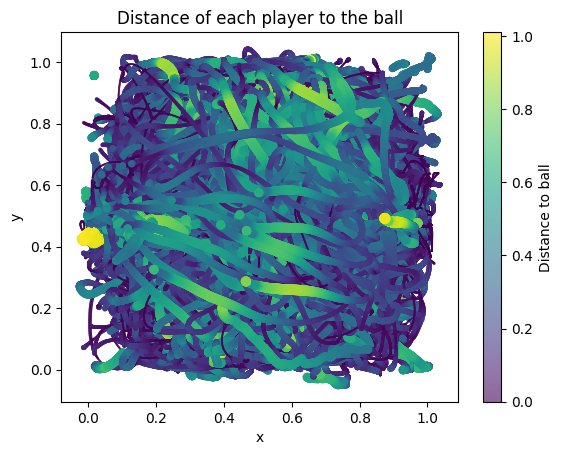

In [41]:
# Creating a figure and axes
fig, ax = plt.subplots()

# Creating a scatter plot of player positions
scatter = ax.scatter(df_players_ball['x'], df_players_ball['y'], 
                     c=df_players_ball['distance_to_ball'], 
                     cmap='viridis', 
                     s=df_players_ball['distance_to_ball']*50, # Scale factor for visibility
                     alpha=0.6)

# Creating a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Distance to ball')

# Adding labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Distance of each player to the ball')

# Showing the plot
plt.show()


## Heatmap

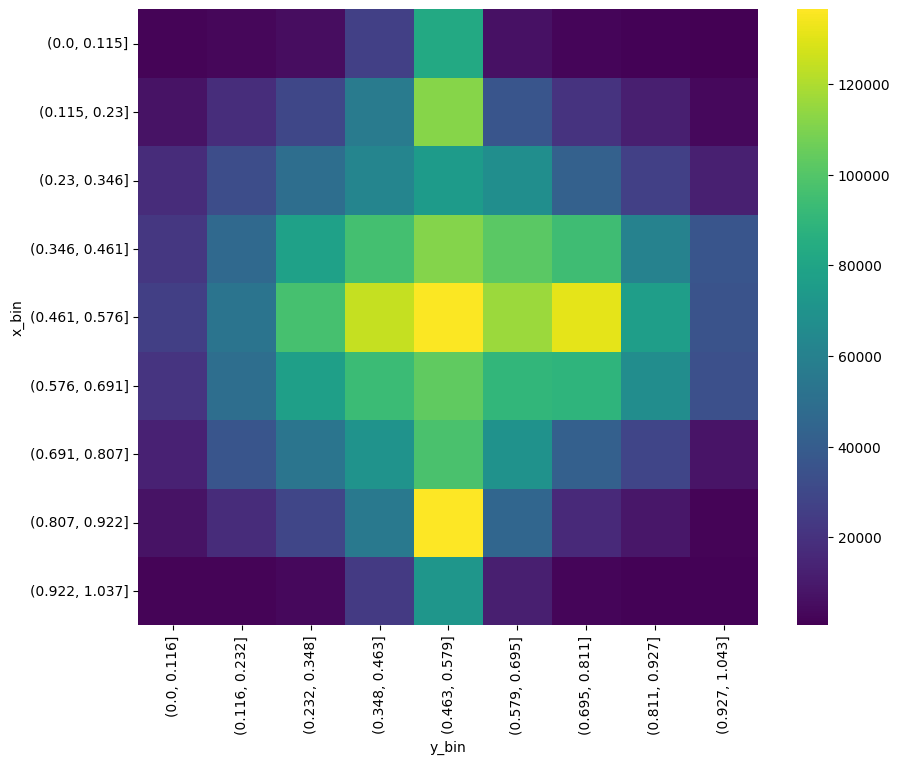

In [43]:
import seaborn as sns
# Discretize the field into a grid of cells
bins_x = np.linspace(0, df_players_ball['x'].max(), 10)
bins_y = np.linspace(0, df_players_ball['y'].max(), 10)
df_players_ball['x_bin'] = pd.cut(df_players_ball['x'], bins=bins_x)
df_players_ball['y_bin'] = pd.cut(df_players_ball['y'], bins=bins_y)

# Count the number of player positions that fall into each cell
heatmap_data = df_players_ball.groupby(['x_bin', 'y_bin']).size().unstack()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.show()

# Finding the centroid

Finding the centroid of player positions can be useful in understanding the spatial organization of players. The centroid represents the average position of the players and can provide insights into the overall team shape and structure

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


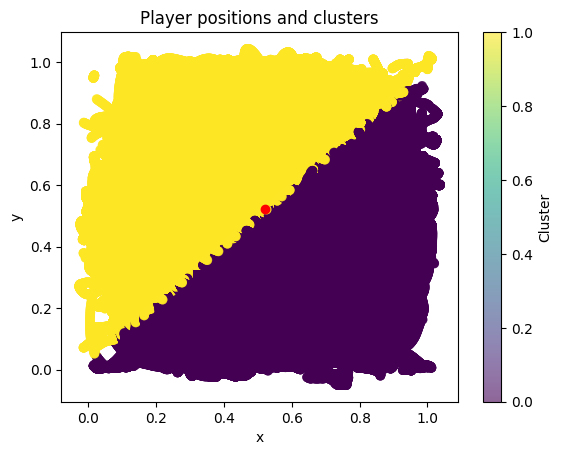

In [44]:
from sklearn.cluster import KMeans

# Calculate the centroid of player positions
centroid_x = df_players_ball['x'].mean()
centroid_y = df_players_ball['y'].mean()

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_players_ball[['x', 'y']])

# Add cluster labels to the DataFrame
df_players_ball['cluster'] = kmeans.labels_

# Visualize the player positions, centroid, and clusters
fig, ax = plt.subplots()

scatter = ax.scatter(df_players_ball['x'], df_players_ball['y'], c=df_players_ball['cluster'], cmap='viridis', alpha=0.6)

ax.scatter(centroid_x, centroid_y, color='red')  # Centroid

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Player positions and clusters')

plt.show()


## Static plot for a specific moment in the match

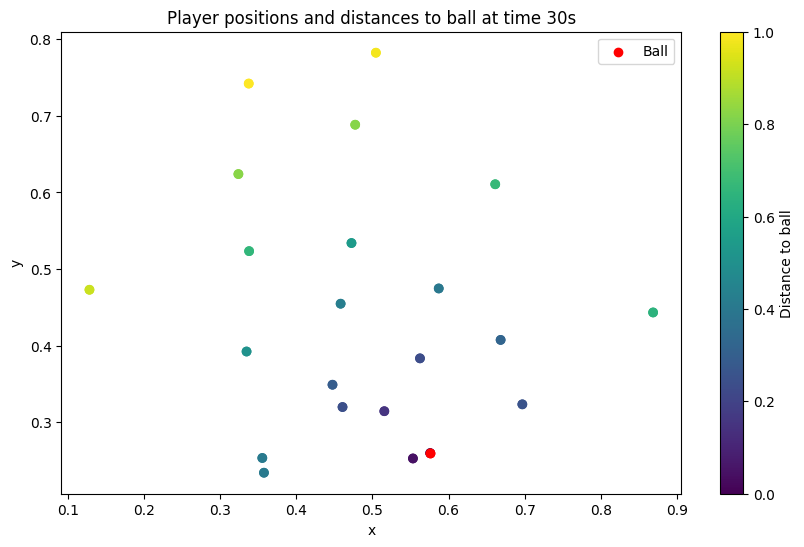

In [50]:

time_specific = 30

# Filtering the data for the ball at that time
df_ball_specific_time = df_ball[df_ball['Time [s]'] == time_specific]

# Creating a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df_specific_time['x'], df_specific_time['y'], c=df_specific_time['distance_to_ball'])
plt.scatter(df_ball_specific_time['x'], df_ball_specific_time['y'], c='red', label='Ball') # Add the ball as a red point
plt.colorbar(label='Distance to ball')
plt.title(f'Player positions and distances to ball at time {time_specific}s')
plt.xlabel('x')
plt.ylabel('y')
plt.legend() # Adding a legend to explain the colors and markers
plt.show()


## Heatmap showing the density of players on the field at a specific moment
We use a technique called kernel density estimation (KDE). This technique estimates the probability density function of a random variable – in this case, the (x, y) position of each player.

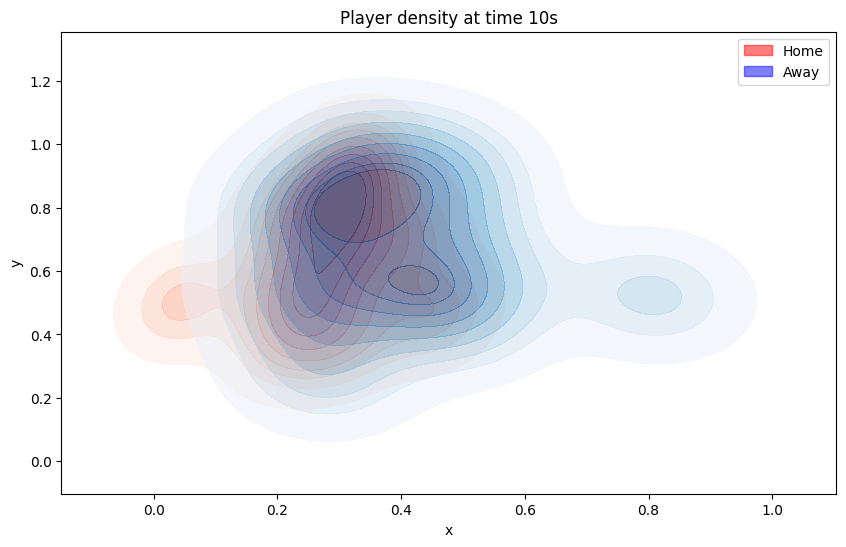

In [53]:
import matplotlib.patches as mpatches
import seaborn as sns

# Select a specific time
time_specific = 10  # for example

# Filter the data for that time for each team
df_specific_time_home = df_players_ball[(df_players_ball['Time [s]'] == time_specific) & (df_players_ball['Team'] == 'Home')]
df_specific_time_away = df_players_ball[(df_players_ball['Time [s]'] == time_specific) & (df_players_ball['Team'] == 'Away')]

plt.figure(figsize=(10,6))

# Create a KDE plot for the home team
sns.kdeplot(x=df_specific_time_home['x'], y=df_specific_time_home['y'], cmap='Reds', fill=True, alpha=0.5)

# Create a KDE plot for the away team
sns.kdeplot(x=df_specific_time_away['x'], y=df_specific_time_away['y'], cmap='Blues', fill=True, alpha=0.5)

# Create legend
red_patch = mpatches.Patch(color='red', label='Home', alpha=0.5)
blue_patch = mpatches.Patch(color='blue', label='Away', alpha=0.5)
plt.legend(handles=[red_patch, blue_patch])

plt.title(f'Player density at time {time_specific}s')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


The color intensity represents the density of players: darker areas have a higher density of players. The red represents the home team and blue represents the away team. You can see where each team's players are concentrated at the specified moment in time.

# Separate heatmaps for the home and away team

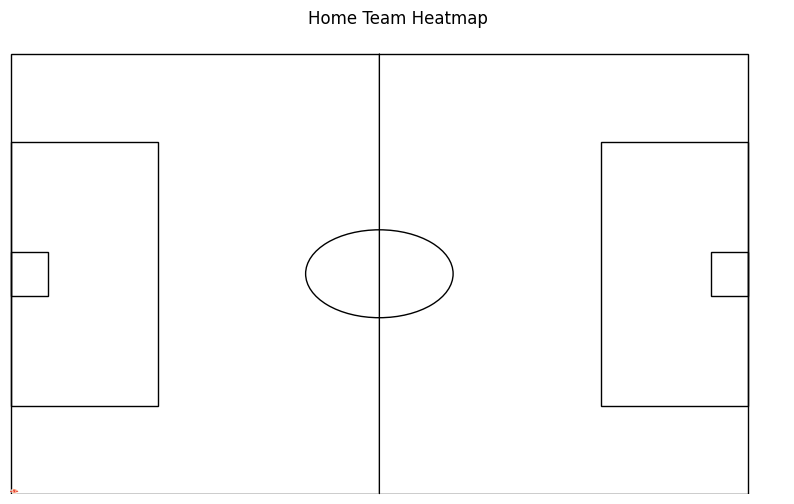

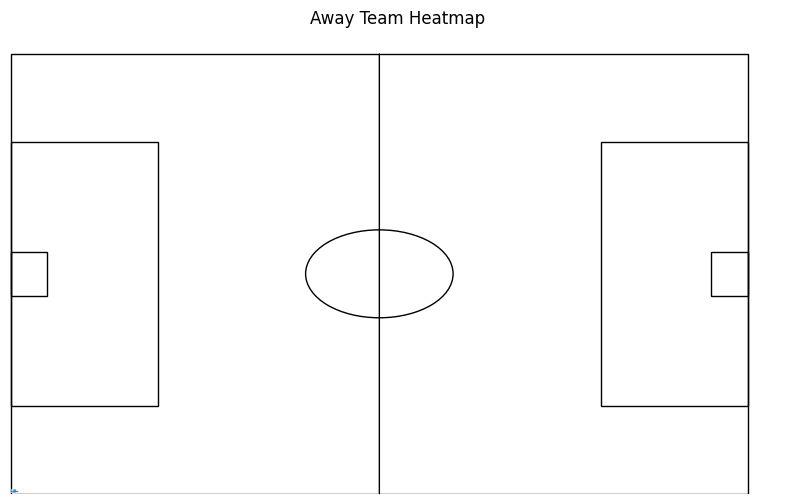

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle, ConnectionPatch, Circle

# Function to draw a football pitch
def draw_pitch():
    # Create figure
    fig, ax = plt.subplots(figsize=(10,6))
    plt.axis(False)
    
    # Outer boundary
    outer = Rectangle((0,0), width=100, height=100, edgecolor='black', facecolor='none')
    
    # Goals
    goal1 = Rectangle((0,45), width=5, height=10, edgecolor='black', facecolor='none')
    goal2 = Rectangle((95,45), width=5, height=10, edgecolor='black', facecolor='none')

    # Penalty Areas
    penalty1 = Rectangle((0,20), width=20, height=60, edgecolor='black', facecolor='none')
    penalty2 = Rectangle((80,20), width=20, height=60, edgecolor='black', facecolor='none')

    # Center circle
    center_circle = Circle((50,50), 10, color='black', fill=False)

    # Halfway line
    halfway_line = ConnectionPatch((50,0), (50,100), 'data', 'data')

    # Add patches to axes
    for patch in [outer, goal1, goal2, penalty1, penalty2, center_circle, halfway_line]:
        ax.add_patch(patch)

    return fig, ax

# Draw pitch
fig, ax = draw_pitch()

# Create a KDE plot for the home team
sns.kdeplot(x=df_players_ball[df_players_ball['Team'] == 'Home']['x'], 
            y=df_players_ball[df_players_ball['Team'] == 'Home']['y'], 
            cmap='Reds', fill=True, alpha=0.5, ax=ax)

plt.title('Home Team Heatmap')
plt.show()

# Draw pitch
fig, ax = draw_pitch()

# Create a KDE plot for the away team
sns.kdeplot(x=df_players_ball[df_players_ball['Team'] == 'Away']['x'], 
            y=df_players_ball[df_players_ball['Team'] == 'Away']['y'], 
            cmap='Blues', fill=True, alpha=0.5, ax=ax)

plt.title('Away Team Heatmap')
plt.show()
